# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv
/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_lter.csv


# Load Dataset

In [2]:
df = pd.read_csv('/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Explatory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
df.shape

(344, 7)

In [6]:
100 * (10 / 344)

2.9069767441860463

In [7]:
df = df.dropna()

In [8]:
df.describe().round(2)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.00,334.00,334.00,334.00
mean,43.99,17.16,201.01,4209.06
std,5.46,1.97,14.02,804.84
min,32.10,13.10,172.00,2700.00
25%,39.50,15.60,190.00,3550.00
50%,44.50,17.30,197.00,4050.00
75%,48.58,18.70,213.00,4793.75
max,59.60,21.50,231.00,6300.00


In [9]:
df['island'].value_counts()

island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64

In [10]:
df['species'].value_counts()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

# Graphic Visualization

In [11]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

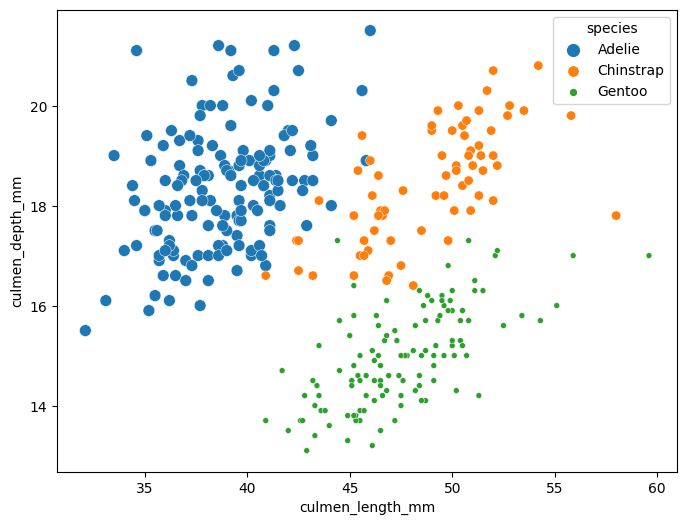

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, hue='species', size='species')
plt.show()

<Figure size 1200x500 with 0 Axes>

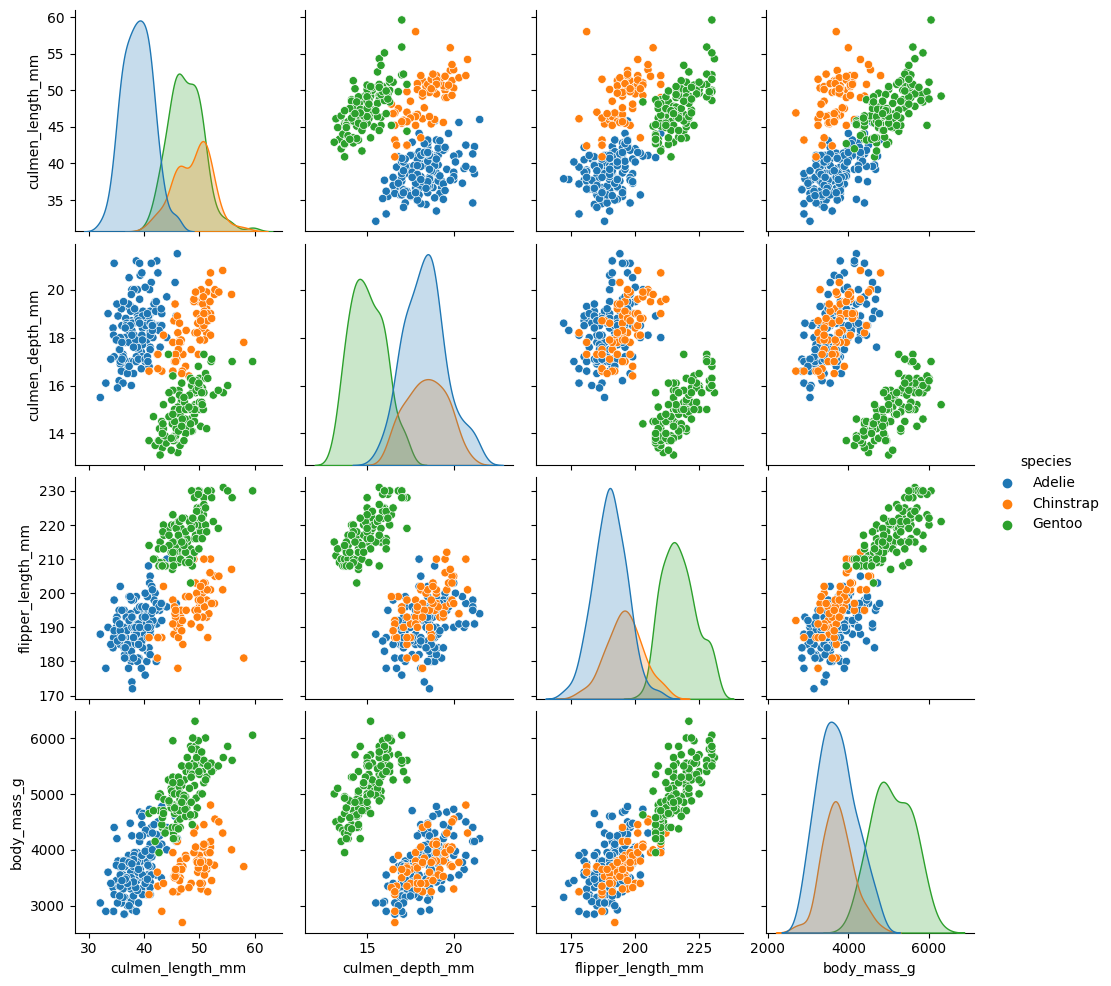

In [13]:
plt.figure(figsize=(12, 5))
sns.pairplot(df, hue='species')
plt.show()

# Feature Engineering

Manually doing one hot encoding, instead of using label or encoders. This is to just avoid too many additional features being created by above methods.

In [14]:
df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'], [0, 1, 2], inplace=True)

In [15]:
df['island'].replace(['Torgersen', 'Biscoe', 'Dream'], [0,1,2], inplace=True)

In [16]:
df['sex'].replace(['MALE', 'FEMALE'], [0, 1], inplace=True)

In [17]:
df['sex'].value_counts()

sex
0    168
1    165
.      1
Name: count, dtype: int64

In [18]:
df = df[df['sex'] != '.']

In [19]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,0
1,0,0,39.5,17.4,186.0,3800.0,1
2,0,0,40.3,18.0,195.0,3250.0,1
4,0,0,36.7,19.3,193.0,3450.0,1
5,0,0,39.3,20.6,190.0,3650.0,0


In [20]:
X = df.drop('species', axis=1)
y = df['species']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

# Model Training

In [22]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9727272727272728

In [23]:
y_preds = model.predict(X_test)

acc_score = accuracy_score(y_test, y_preds)
class_report = classification_report(y_test, y_preds)
cm = confusion_matrix(y_test, y_preds)

print('Accuracy score', round(acc_score, 2))
print('Classification Report', class_report)

Accuracy score 0.97
Classification Report               precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.96      0.96      0.96        26
           2       0.97      1.00      0.99        37

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110



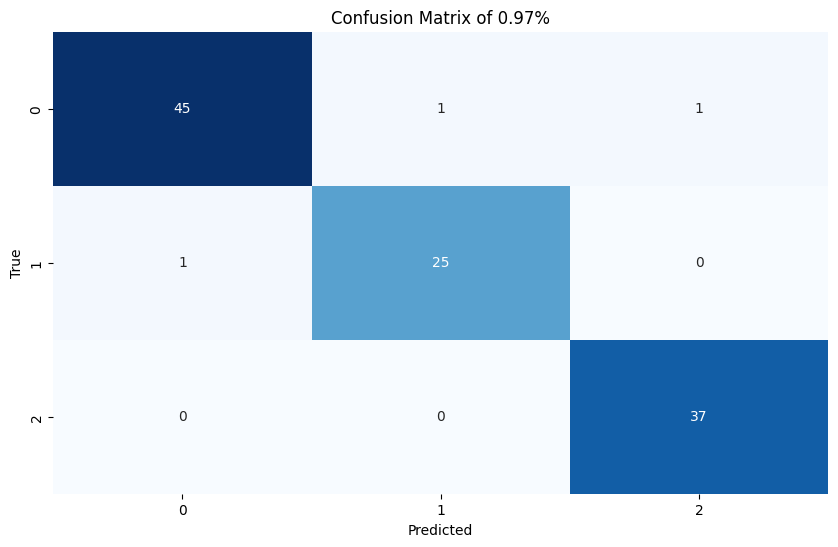

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix of {acc_score:.2f}%')
plt.show()

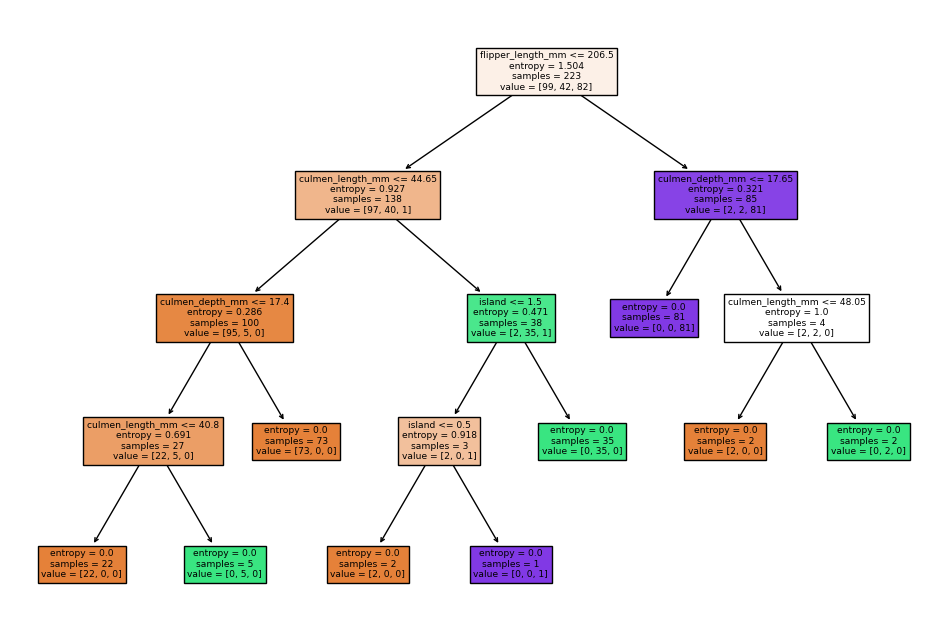

In [25]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

# Train and Evaluate Random Forest Classifier

In [26]:
random_forest = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=20)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_features='auto', n_estimators=10, random_state=20)

In [27]:
y_pred_forest = random_forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred_forest)
acc_score = accuracy_score(y_test, y_pred_forest)
print("Random Forest Classifier Performance")
print(f"Accuracy score: {acc_score:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_forest))

Random Forest Classifier Performance
Accuracy score: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.96      0.98        26
           2       1.00      1.00      1.00        37

    accuracy                           0.99       110
   macro avg       0.99      0.99      0.99       110
weighted avg       0.99      0.99      0.99       110



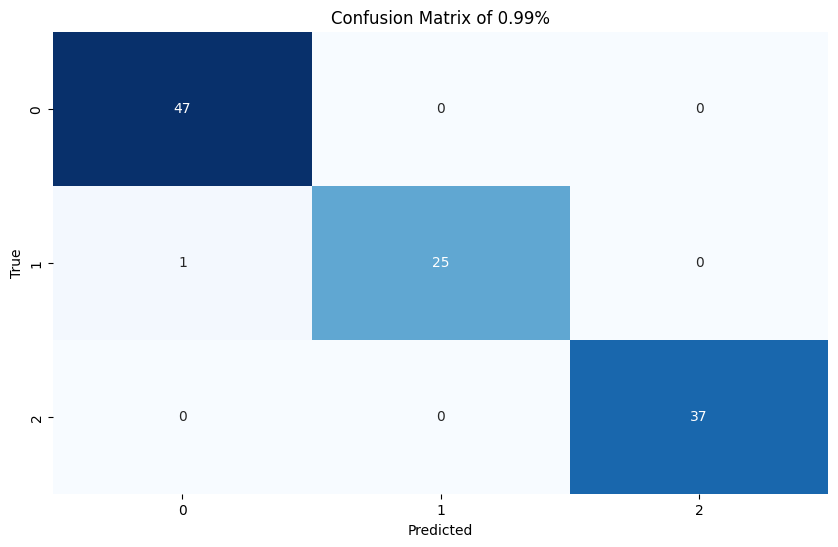

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix of {acc_score:.2f}%')
plt.show()